In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [5]:
rawData = pd.read_csv("./data/data.csv")
rawData.describe()

,house_pk,agency_id,price,dis_water_real,dis_shopping,no_bedrooms,max_persons,house_size,land_size,build_year,renovation_year,apartment,indoor_pool,spa,internet,pets_allowed,water_view,fire_stove,agency_rating
count,85195.000000,85195.00000,85195.000000,85195.000000,85195.000000,85195.000000,85195.000000,85195.000000,85195.000000,85195.00000,85195.000000,85195.000000,85195.000000,85195.000000,85195.000000,85195.000000,85195.000000,85195.000000,85195.000000
mean,88420.225412,120.94698,560.170879,2.442597,1.445012,2.503668,6.380985,84.346511,1264.297189,1984.95137,2004.836563,0.166195,0.033922,0.531616,0.803099,0.543647,0.170022,0.659405,3.748366
std,23073.445439,26.24260,312.439706,7.398710,1.691833,0.881968,1.844330,41.507354,1336.333740,33.81816,7.977483,0.372258,0.181030,0.499002,0.397659,0.498094,0.375654,0.473912,0.803859
min,1108.000000,90.00000,28.000000,0.000000,0.001000,1.000000,4.000000,25.000000,0.000000,1814.00000,1982.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,85799.000000,90.00000,336.000000,0.441000,0.400000,2.000000,6.000000,58.000000,130.000000,1980.00000,2002.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000
50%,91750.000000,121.00000,455.000000,0.810000,0.800000,3.000000,6.000000,82.000000,1100.000000,1990.00000,2006.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,4.000000
75%,99669.000000,130.00000,700.000000,1.493000,2.000000,3.000000,7.000000,106.000000,2138.000000,2005.00000,2010.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,4.000000
max,116663.000000,160.00000,2688.000000,45.559000,10.000000,5.000000,16.000000,216.000000,10000.000000,2015.00000,2018.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000


In [3]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85195 entries, 0 to 85194
Data columns (total 20 columns):
house_pk           85195 non-null int64
agency_id          85195 non-null int64
date_in            85195 non-null object
price              85195 non-null int64
dis_water_real     85195 non-null float64
dis_shopping       85195 non-null float64
no_bedrooms        85195 non-null int64
max_persons        85195 non-null int64
house_size         85195 non-null int64
land_size          85195 non-null int64
build_year         85195 non-null int64
renovation_year    85195 non-null int64
apartment          85195 non-null int64
indoor_pool        85195 non-null int64
spa                85195 non-null int64
internet           85195 non-null int64
pets_allowed       85195 non-null int64
water_view         85195 non-null int64
fire_stove         85195 non-null int64
agency_rating      85195 non-null float64
dtypes: float64(3), int64(16), object(1)
memory usage: 13.0+ MB


In [4]:
rows_h1 = rawData[rawData["house_pk"] == 84561]

In [5]:
len(rows_h1)

1107

In [6]:
ts = pd.to_datetime(rows_h1["date_in"])
price = rows_h1["price"]
data = zip(ts, price)
df = pd.DataFrame(data)


In [7]:
df.head()

,0,1
0,2016-08-27,532
1,2016-08-26,588
2,2016-08-25,588
3,2016-08-24,588
4,2016-08-23,588


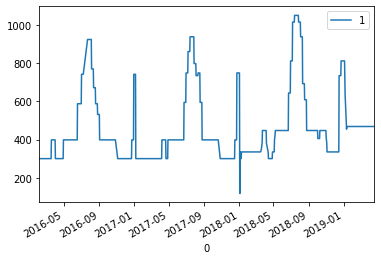

In [8]:
df.plot(x=0, y=1)

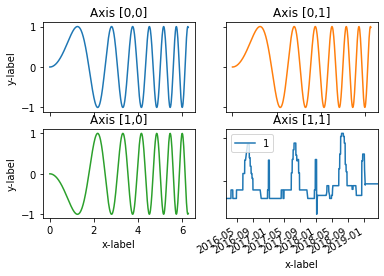

In [9]:
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(x, y)
axs[0, 0].set_title('Axis [0,0]')

axs[0, 1].plot(x, y, 'tab:orange')
axs[0, 1].set_title('Axis [0,1]')

axs[1, 0].plot(x, -y, 'tab:green')
axs[1, 0].set_title('Axis [1,0]')

#axs[1, 1].plot(x, -y, 'tab:red')   
df.plot(x=0, y=1, ax=axs[1, 1])
axs[1, 1].set_title('Axis [1,1]')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

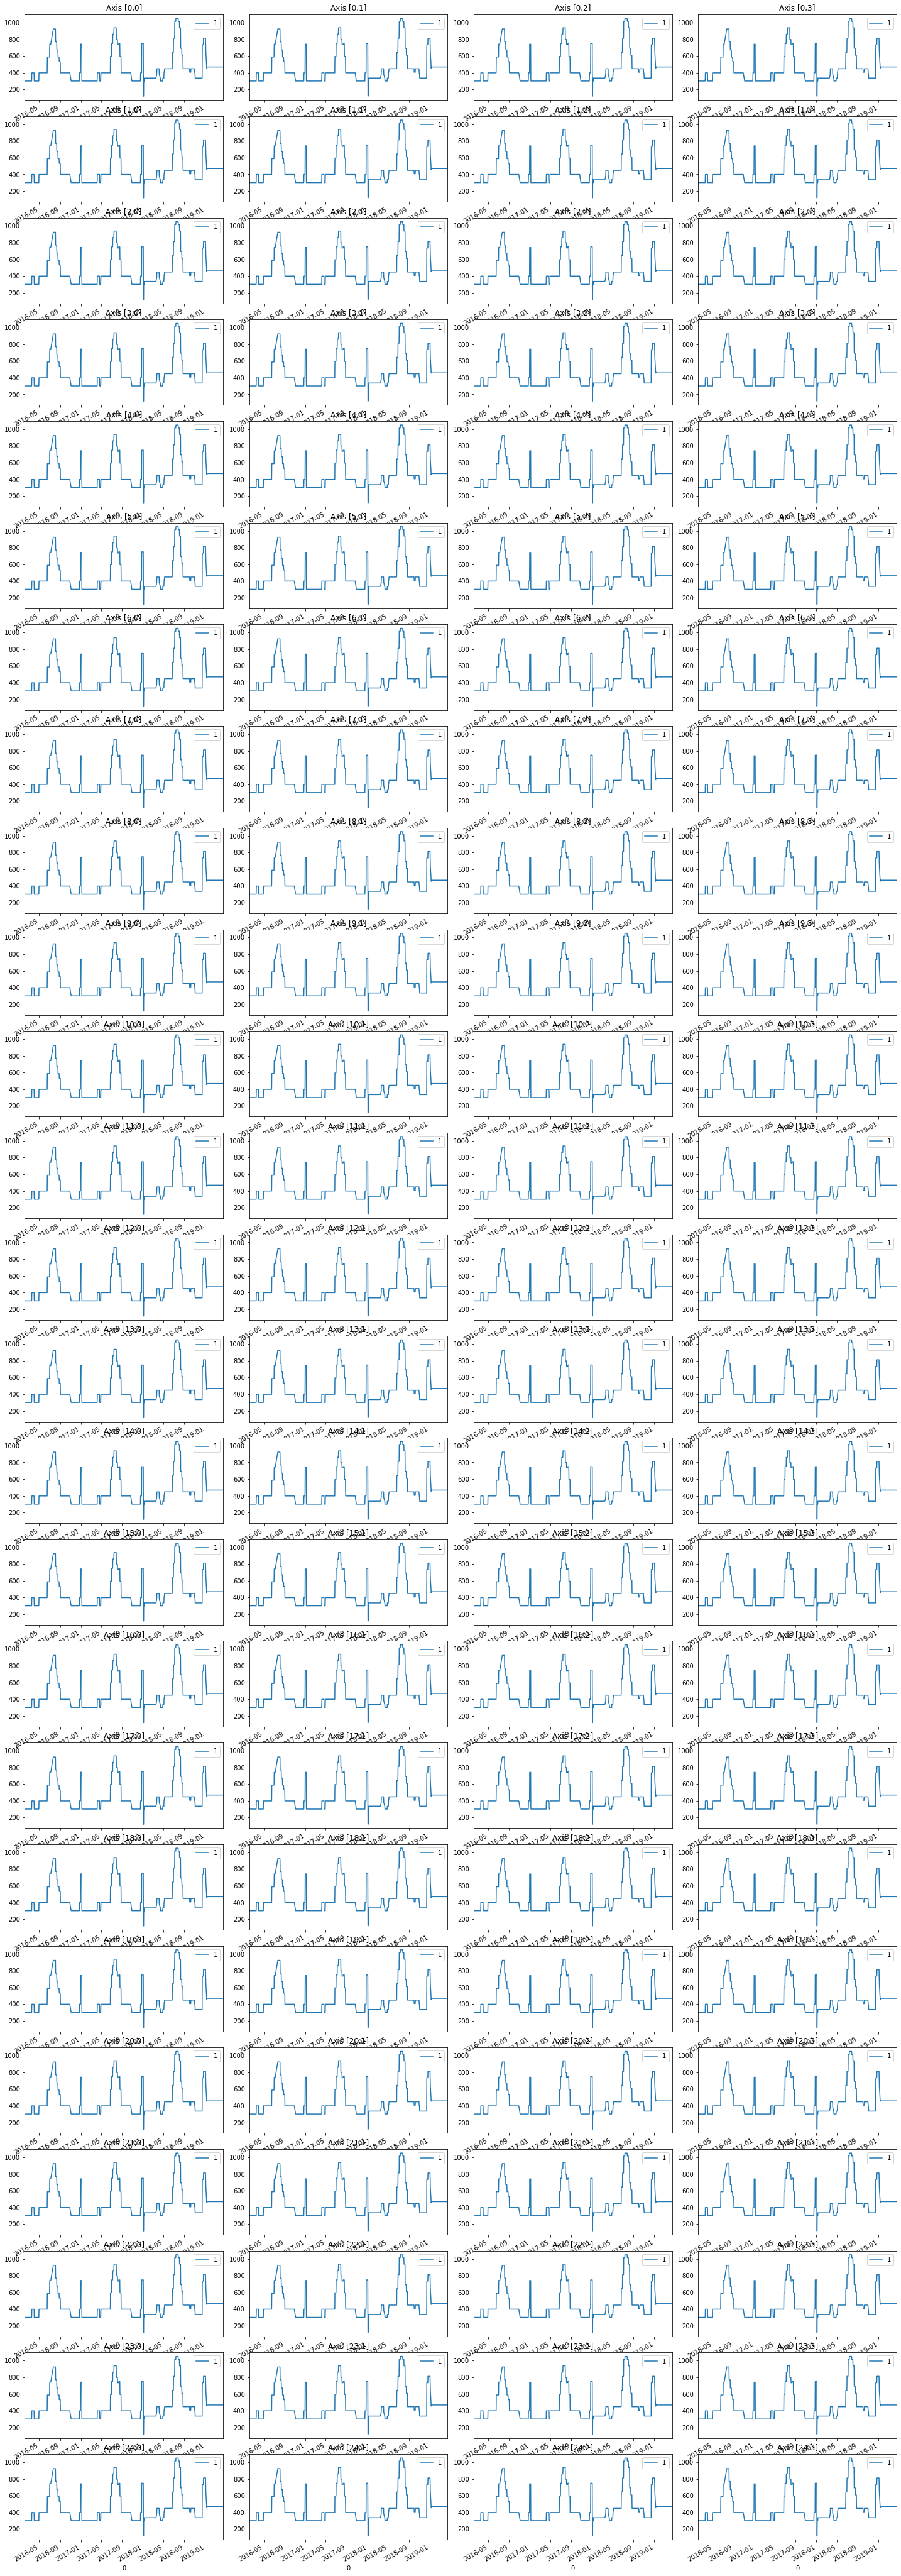

In [93]:
nCols = 4
nRows = 25
fig, axs = plt.subplots(nRows, nCols,figsize=(20,70))
fig.tight_layout()
for row in np.arange(nRows):
    for col in np.arange(nCols):
        df.plot(x=0, y=1, ax=axs[row, col])
        axs[row, col].set_title('Axis [{},{}]'.format(row, col))


In [6]:
def getDataFrameForHousePK(house_pk):
    rows_pk = rawData[rawData["house_pk"] == house_pk]
    ts_pk = pd.to_datetime(rows_pk["date_in"])
    price_pk = rows_pk["price"]
    data_pk = zip(ts_pk, price_pk)
    df_pk = pd.DataFrame(data_pk)
    df_pk.columns = ['date_in', 'price']
    df_pk['year'] = df_pk['date_in'].map(lambda t: t.year - 2015)
    df_pk['month'] = df_pk['date_in'].map(lambda t: t.month)
    df_pk['day'] = df_pk['date_in'].map(lambda t: t.day)
    return df_pk

In [7]:
uniquePKs = rawData['house_pk'].unique()
dictPKVsDF = {}
for uKey in uniquePKs:
    dictPKVsDF[uKey] = getDataFrameForHousePK(uKey)

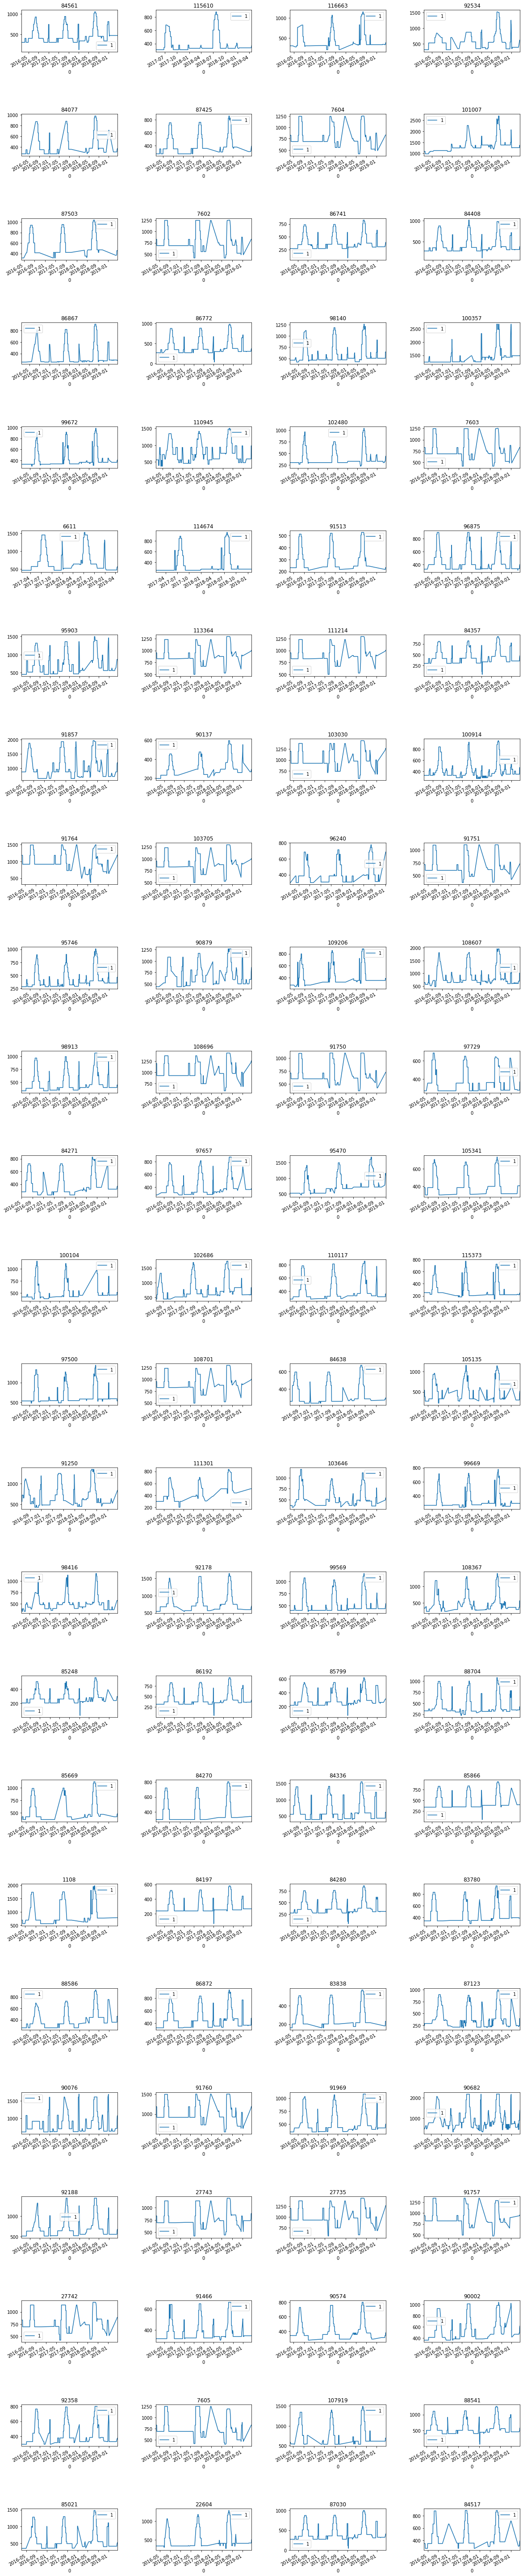

In [42]:
nCols = 4
nRows = 25
iKey = 0

fig, axs = plt.subplots(nRows, nCols,figsize=(20,100))
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=1.5, wspace=0.4)
for row in np.arange(nRows):
    for col in np.arange(nCols):
        df = dictPKVsDF[uniquePKs[iKey]]
        df.plot(x=0, y=1, ax=axs[row, col])
        axs[row, col].set_title(uniquePKs[iKey])
        iKey +=1;

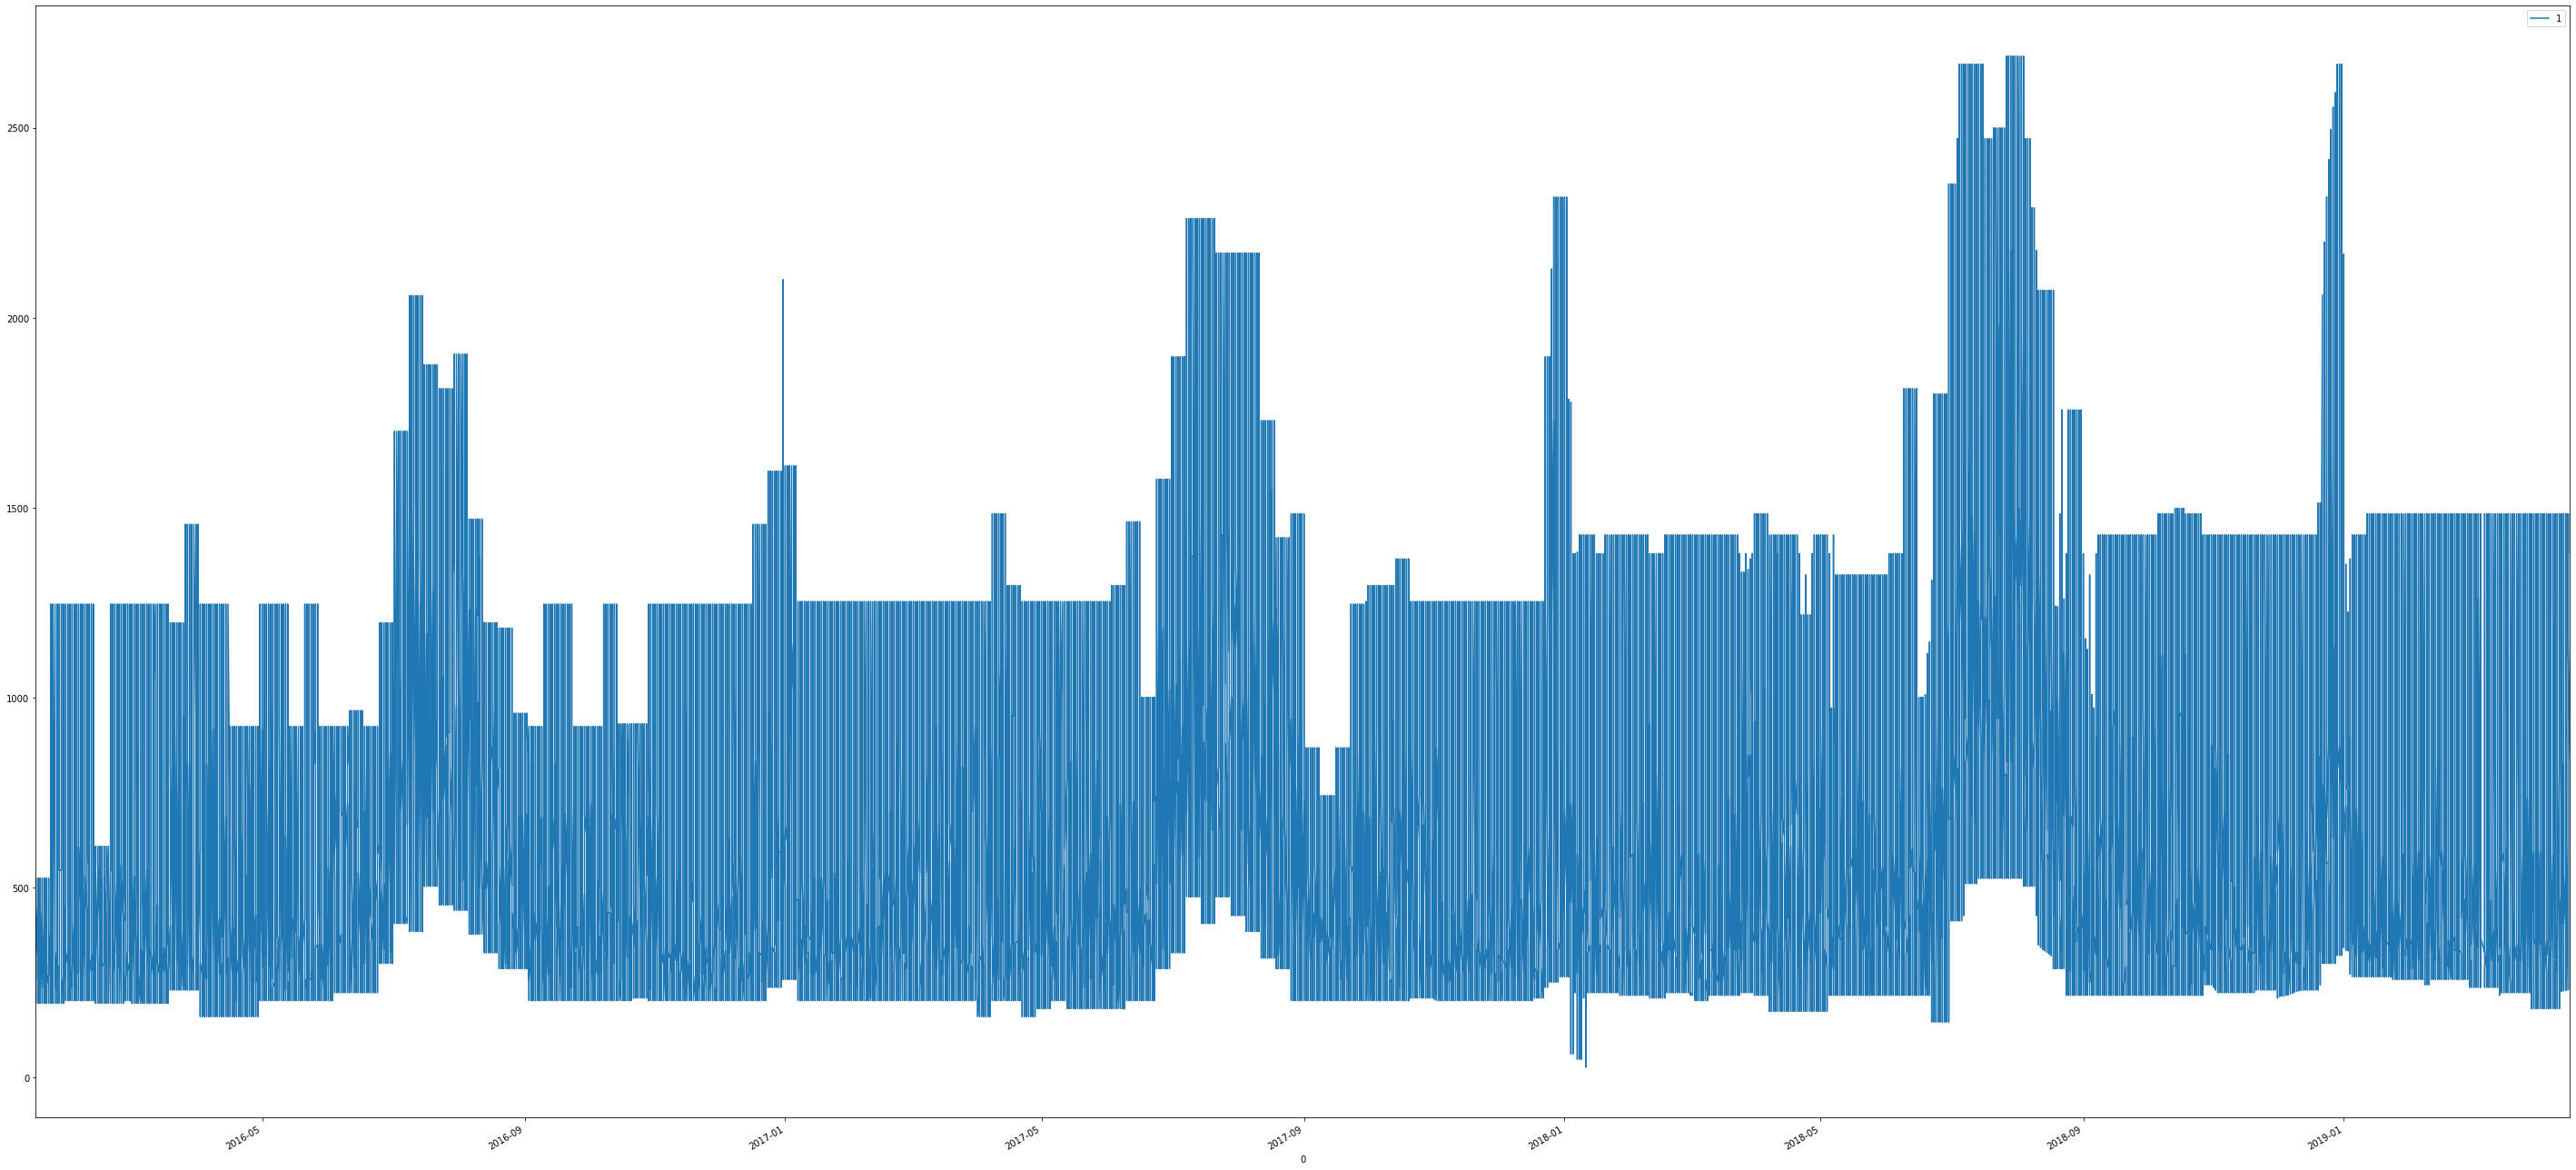

In [39]:
all_ts = pd.to_datetime(rawData['date_in'])
all_price = rawData['price']
all_data = zip(all_ts, all_price)
all_df = pd.DataFrame(all_data)

all_df.plot(x=0, y=1, figsize=(50, 25))

In [8]:
def show_plot(plot_data, delta, title):
    labels = ['History', 'True Future', 'Model Prediction']
    marker = ['.-', 'rx', 'go']
    time_steps = create_time_steps(plot_data[0].shape[0])
    if delta:
        future = delta
    else:
        future = 0

    plt.title(title)
    for i, x in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i], markersize=10,label=labels[i])                   
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    plt.legend()
    plt.xlim([time_steps[0], (future+5)*2])
    plt.xlabel('Time-Step')
    return plt

In [9]:
show_plot([x_train_uni[0], y_train_uni[0]], 0, 'Sample Example')

NameError: name 'x_train_uni' is not defined

In [95]:
df = dictPKVsDF[108607]
df = df.sort_values(by='date_in')
#df[0] = pd.to_timedelta(df[0]).dt.total_seconds().astype(int)
df.head()


,date_in,price,year,month,day
128,2016-01-23,637,1,1,23
136,2016-01-24,637,1,1,24
200,2016-01-25,637,1,1,25
194,2016-01-26,637,1,1,26
23,2016-01-27,637,1,1,27


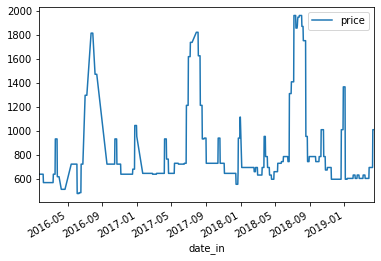

In [96]:
df.plot.line(x=0, y=1)
plt.show()


In [97]:
uni_data = df['price']
uni_data.index = df['date_in']
uni_data.head()
TRAIN_SPLIT = round(len(df) * 0.7)

In [98]:
uni_data = uni_data.values
uni_train_mean = uni_data[:TRAIN_SPLIT].mean()
uni_train_std = uni_data[:TRAIN_SPLIT].std()
uni_data = (uni_data-uni_train_mean)/uni_train_std
uni_data.shape

(1036,)

In [99]:
def univariate_data(dataset, start_index, end_index, history_size, target_size):
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i-history_size, i)
        # Reshape data from (history_size,) to (history_size, 1)
        data.append(np.reshape(dataset[indices], (history_size, 1)))
        labels.append(dataset[i+target_size])
    return np.array(data), np.array(labels)

In [100]:
univariate_past_history = 20
univariate_future_target = 0

x_train_uni, y_train_uni = univariate_data(uni_data, 0, TRAIN_SPLIT,
                                           univariate_past_history,
                                           univariate_future_target)
x_val_uni, y_val_uni = univariate_data(uni_data, TRAIN_SPLIT, None,
                                       univariate_past_history,
                                       univariate_future_target)

In [101]:
def create_time_steps(length):
    time_steps = []
    for i in range(-length, 0, 1):
        time_steps.append(i)
    return time_steps

In [102]:
def baseline(history):
    return np.mean(history)

In [103]:
BATCH_SIZE = 256
BUFFER_SIZE = 10000

train_univariate = tf.data.Dataset.from_tensor_slices((x_train_uni, y_train_uni))
train_univariate = train_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_univariate = tf.data.Dataset.from_tensor_slices((x_val_uni, y_val_uni))
val_univariate = val_univariate.batch(BATCH_SIZE).repeat()

In [104]:
simple_lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(8, input_shape=x_train_uni.shape[-2:]),
    tf.keras.layers.Dense(1)
])

simple_lstm_model.compile(optimizer='adam', loss='mae')

In [105]:
for x, y in val_univariate.take(1):
    print(simple_lstm_model.predict(x).shape)

(256, 1)


In [106]:
EVALUATION_INTERVAL = 200
EPOCHS = 10

simple_lstm_model.fit(train_univariate, epochs=EPOCHS,
                      steps_per_epoch=EVALUATION_INTERVAL,
                      validation_data=val_univariate, validation_steps=50)

Train for 200 steps, validate for 50 steps
Epoch 1/10
200/200 [==============================] - 3s 17ms/step - loss: 0.4799 - val_loss: 0.5085
Epoch 2/10
200/200 [==============================] - 2s 8ms/step - loss: 0.2578 - val_loss: 0.2908
Epoch 3/10
200/200 [==============================] - 2s 8ms/step - loss: 0.1486 - val_loss: 0.1867
Epoch 4/10
200/200 [==============================] - 2s 8ms/step - loss: 0.1034 - val_loss: 0.1401
Epoch 5/10
200/200 [==============================] - 2s 8ms/step - loss: 0.0835 - val_loss: 0.1154
Epoch 6/10
200/200 [==============================] - 2s 8ms/step - loss: 0.0751 - val_loss: 0.1045
Epoch 7/10
200/200 [==============================] - 2s 8ms/step - loss: 0.0718 - val_loss: 0.0971
Epoch 8/10
200/200 [==============================] - 2s 8ms/step - loss: 0.0695 - val_loss: 0.0921
Epoch 9/10
200/200 [==============================] - 2s 8ms/step - loss: 0.0681 - val_loss: 0.0866
Epoch 10/10
200/200 [==============================] - 2

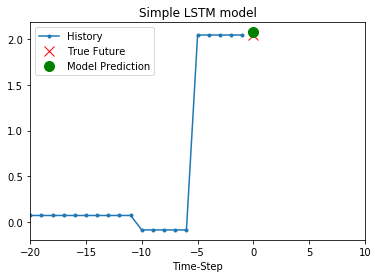

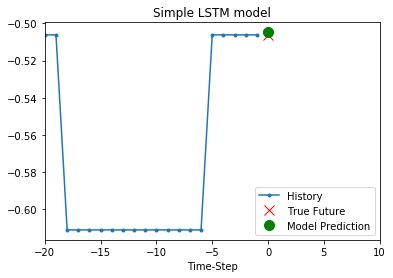

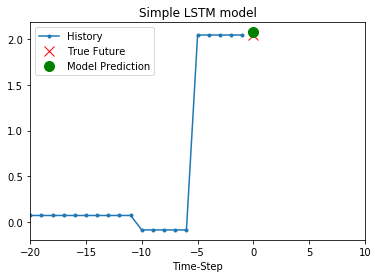

In [107]:
for x, y in val_univariate.take(3):
    plot = show_plot([x[0].numpy(), y[0].numpy(),
                    simple_lstm_model.predict(x)[0]], 0, 'Simple LSTM model')
    plot.show()

In [72]:
features_considered =  ['price', 'month']
features = df[features_considered]
features.index = df['date_in']
features.head()

,price,month
date_in,,
2016-02-06,301,2
2016-02-07,301,2
2016-02-08,301,2
2016-02-09,301,2
2016-02-10,301,2


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000016D04A55F28>,
      dtype=object)

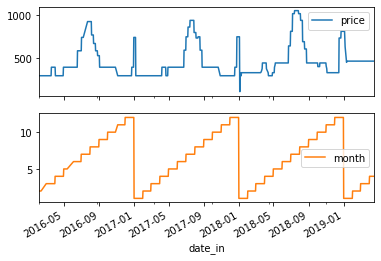

In [73]:
features.plot(subplots=True)

In [74]:
dataset = features.values
data_mean = dataset.mean(axis=0)
data_std = dataset.std(axis=0)
dataset = (dataset-data_mean)/data_std
dataset.shape

(1107, 2)

In [75]:
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i-history_size, i, step)
        data.append(dataset[indices])

        if single_step:
          labels.append(target[i+target_size])
        else:
          labels.append(target[i:i+target_size])

    return np.array(data), np.array(labels)

In [76]:
past_history = 270
future_target = 30
STEP = 6

x_train_single, y_train_single = multivariate_data(dataset, dataset[:, 1], 0,
                                                   TRAIN_SPLIT, past_history,
                                                   future_target, STEP,
                                                   single_step=True)
x_val_single, y_val_single = multivariate_data(dataset, dataset[:, 1],
                                               TRAIN_SPLIT, None, past_history,
                                               future_target, STEP,
                                               single_step=True)

In [77]:
print ('Single window of past history : {}'.format(x_train_single[0].shape))

Single window of past history : (45, 2)


In [78]:
train_data_single = tf.data.Dataset.from_tensor_slices((x_train_single, y_train_single))
train_data_single = train_data_single.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_single = tf.data.Dataset.from_tensor_slices((x_val_single, y_val_single))
val_data_single = val_data_single.batch(BATCH_SIZE).repeat()

In [79]:
single_step_model = tf.keras.models.Sequential()
single_step_model.add(tf.keras.layers.LSTM(32,
                                           input_shape=x_train_single.shape[-2:]))
single_step_model.add(tf.keras.layers.Dense(1))

single_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='mae')

In [80]:
for x, y in val_data_single.take(1):
    print(single_step_model.predict(x).shape)

(32, 1)


In [81]:
single_step_history = single_step_model.fit(train_data_single, epochs=EPOCHS,
                                            steps_per_epoch=EVALUATION_INTERVAL,
                                            validation_data=val_data_single,
                                            validation_steps=50)

Train for 200 steps, validate for 50 steps
Epoch 1/10
200/200 [==============================] - 8s 41ms/step - loss: 0.2147 - val_loss: 0.2203
Epoch 2/10
200/200 [==============================] - 6s 32ms/step - loss: 0.0978 - val_loss: 0.0957
Epoch 3/10
200/200 [==============================] - 6s 32ms/step - loss: 0.0875 - val_loss: 0.0781
Epoch 4/10
200/200 [==============================] - 6s 32ms/step - loss: 0.0820 - val_loss: 0.0720
Epoch 5/10
200/200 [==============================] - 7s 33ms/step - loss: 0.0773 - val_loss: 0.0648
Epoch 6/10
200/200 [==============================] - 7s 33ms/step - loss: 0.0735 - val_loss: 0.0668
Epoch 7/10
200/200 [==============================] - 6s 32ms/step - loss: 0.0696 - val_loss: 0.0550
Epoch 8/10
200/200 [==============================] - 7s 33ms/step - loss: 0.0656 - val_loss: 0.0662
Epoch 9/10
200/200 [==============================] - 7s 33ms/step - loss: 0.0626 - val_loss: 0.0616
Epoch 10/10
200/200 [===========================

In [82]:
def plot_train_history(history, title):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(loss))

    plt.figure()

    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title(title)
    plt.legend()

    plt.show()

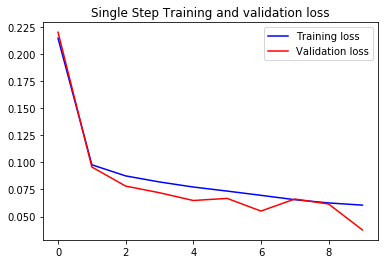

In [83]:
plot_train_history(single_step_history,
                   'Single Step Training and validation loss')

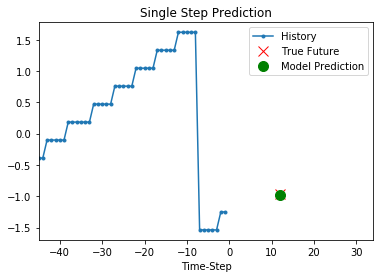

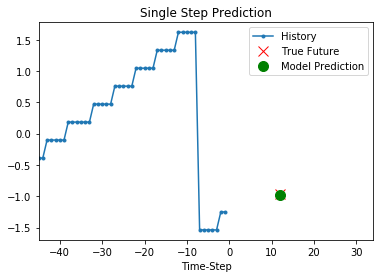

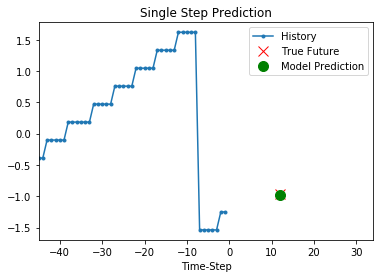

In [84]:
for x, y in val_data_single.take(3):
    plot = show_plot([x[0][:, 1].numpy(), y[0].numpy(),
                    single_step_model.predict(x)[0]], 12,
                   'Single Step Prediction')
    plot.show()

In [85]:
future_target = 60
x_train_multi, y_train_multi = multivariate_data(dataset, dataset[:, 1], 0,
                                                 TRAIN_SPLIT, past_history,
                                                 future_target, STEP)
x_val_multi, y_val_multi = multivariate_data(dataset, dataset[:, 1],
                                             TRAIN_SPLIT, None, past_history,
                                             future_target, STEP)

In [86]:
print ('Single window of past history : {}'.format(x_train_multi[0].shape))
print ('\n Target temperature to predict : {}'.format(y_train_multi[0].shape))

Single window of past history : (45, 2)

 Target temperature to predict : (60,)


In [87]:
train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

In [88]:
def multi_step_plot(history, true_future, prediction):
    plt.figure(figsize=(12, 6))
    num_in = create_time_steps(len(history))
    num_out = len(true_future)

    plt.plot(num_in, np.array(history[:, 1]), label='History')
    plt.plot(np.arange(num_out)/STEP, np.array(true_future), 'bo',
           label='True Future')
    if prediction.any():
        plt.plot(np.arange(num_out)/STEP, np.array(prediction), 'ro',
             label='Predicted Future')
    plt.legend(loc='upper left')
    plt.show()

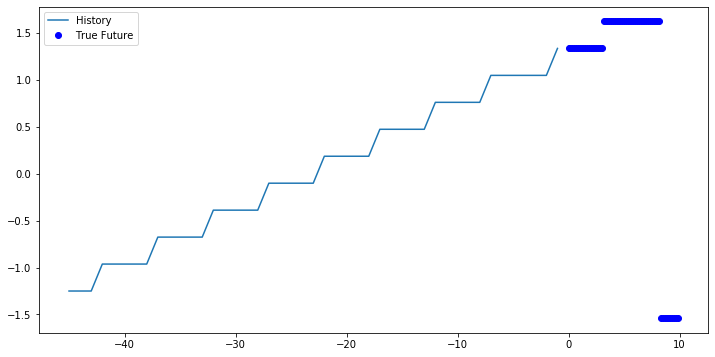

In [89]:
for x, y in train_data_multi.take(1):
    multi_step_plot(x[0], y[0], np.array([0]))

In [90]:
multi_step_model = tf.keras.models.Sequential()
multi_step_model.add(tf.keras.layers.LSTM(32,
                                          return_sequences=True,
                                          input_shape=x_train_multi.shape[-2:]))
multi_step_model.add(tf.keras.layers.LSTM(16, activation='relu'))
multi_step_model.add(tf.keras.layers.Dense(60))

multi_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(clipvalue=1.0), loss='mae')

In [91]:
for x, y in val_data_multi.take(1):
    print (multi_step_model.predict(x).shape)

(2, 60)


In [92]:
multi_step_history = multi_step_model.fit(train_data_multi, epochs=EPOCHS,
                                          steps_per_epoch=EVALUATION_INTERVAL,
                                          validation_data=val_data_multi,
                                          validation_steps=50)

Train for 200 steps, validate for 50 steps
Epoch 1/10
200/200 [==============================] - 16s 79ms/step - loss: 0.3770 - val_loss: 0.2700
Epoch 2/10
200/200 [==============================] - 13s 63ms/step - loss: 0.1709 - val_loss: 0.1919
Epoch 3/10
200/200 [==============================] - 13s 63ms/step - loss: 0.1418 - val_loss: 0.1415
Epoch 4/10
200/200 [==============================] - 13s 63ms/step - loss: 0.1265 - val_loss: 0.0816
Epoch 5/10
200/200 [==============================] - 13s 63ms/step - loss: 0.1172 - val_loss: 0.0957
Epoch 6/10
200/200 [==============================] - 12s 62ms/step - loss: 0.1117 - val_loss: 0.0808
Epoch 7/10
200/200 [==============================] - 12s 62ms/step - loss: 0.1081 - val_loss: 0.0773
Epoch 8/10
200/200 [==============================] - 12s 62ms/step - loss: 0.1055 - val_loss: 0.0752
Epoch 9/10
200/200 [==============================] - 12s 62ms/step - loss: 0.1036 - val_loss: 0.0722
Epoch 10/10
200/200 [==================

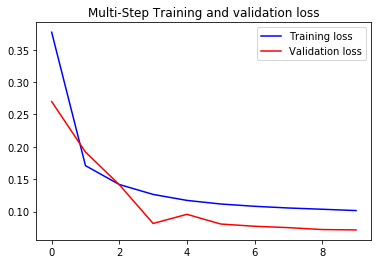

In [93]:
plot_train_history(multi_step_history, 'Multi-Step Training and validation loss')

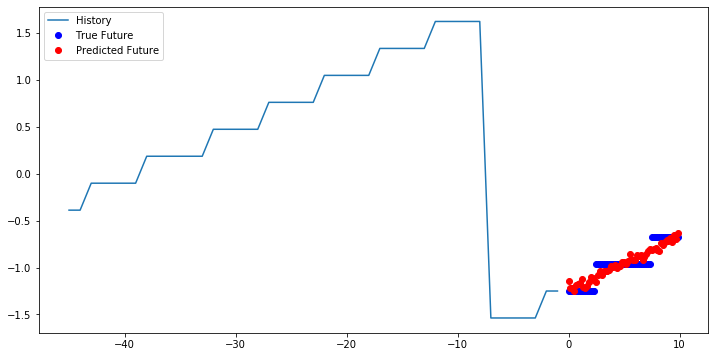

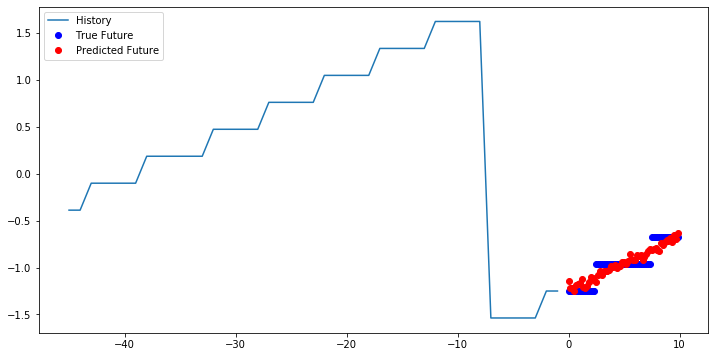

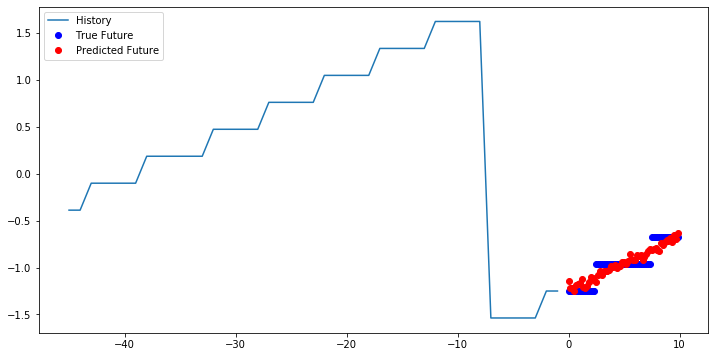

In [94]:
for x, y in val_data_multi.take(3):
    multi_step_plot(x[0], y[0], multi_step_model.predict(x)[0])

In [154]:
import re
exp = "5 * 11.5 - 2 + 235/2"
nums = re.findall('\d*\.\d+|\d+', exp)
ops = re.findall('[*]|[\+]|[-]|[/]', exp)
print(nums)
print(ops)



['5', '11.5', '2', '235', '2']
['*', '-', '+', '/']


In [162]:
def getResult(a, b, op):
    print('exp = {} {} {}'.format(a, op, b))
    a = float(a)
    b = float(b)
    if(op == '+'): return a + b
    if(op == '-'): return a - b
    if(op == '*'): return a * b
    if(op == '/'): return a / b

def calcFormula(strFormula):
    nums = re.findall('\d*\.\d+|\d+', strFormula)
    ops = re.findall('[*]|[\+]|[-]|[/]', strFormula)
    if(len(nums) < 2 or len(ops) < 1): 
        return 0
    
    result = getResult(nums.pop(0), nums.pop(0), ops.pop(0))
    print(result)
    while(len(nums) > 0):
        result = getResult(result, nums.pop(0), ops.pop(0))
        print(result)
    return result;
    

In [163]:
exp = "5 * 11.5 - 2 + 235/2"
calcFormula(exp)

exp = 5 * 11.5
57.5
exp = 57.5 - 2
55.5
exp = 55.5 + 235
290.5
exp = 290.5 / 2
145.25


145.25